<a href="https://colab.research.google.com/github/suhyeon03/DeepLearning/blob/main/4_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# step 37
텐서를 다루다

* 지금까지 변수는 '스칼라'를 다루었다. 그러나 머신러닝 데이터로는 벡터나 행렬등의 '텐서'가 주로 쓰인다.
* 텐서를 사용할 때 주의할 점을 알아보면서 DeZero 확장을 준비해보자

원소별 계산

* 먼저 우리는 함수들을 구현하면서 우리는 입력과 출력이 모두 '스칼라'라고 가정했다.

In [14]:
!git clone https://github.com/GoGiants1/dl-from-scratch-3.git
import sys
sys.path.append('dl-from-scratch-3')

fatal: destination path 'dl-from-scratch-3' already exists and is not an empty directory.


In [15]:
import numpy as np
import dezero.functions as F
from dezero import Variable

x = Variable(np.array(1.0))
y = F.sin(x)
print(y)

variable(0.8414709848078965)


* 이 예에서 x는 단일값인 스칼라(정확하게는 0차원의 ndarray 인스턴스)이다.
* 하지만 x가 텐서일 경우, 가령 행렬이라면 어떻게 될까?

In [16]:
x = Variable(np.array([[1,2,3], [4,5,6]]))
y = F.sin(x)
print(y)

variable([[ 0.84147098  0.90929743  0.14112001]
          [-0.7568025  -0.95892427 -0.2794155 ]])


In [17]:
x = Variable(np.array([[1,2,3], [4,5,6]]))
c = Variable(np.array([[10,20,30], [40,50,60]]))
y = x + c
print(y)

variable([[11 22 33]
          [44 55 66]])


* 넘파이에는 브로드캐스트라는 기능이 있다.
* 만약 x와 c의 형상이 다르면 자동으로 데이터를 복사하여 같은 형상의 텐서로 변환하는 기능이다.
* 40단계에서 자세히 설명한다.

텐서 사용 시의 역전파

* 우리는 그동안 '스칼라'를 대상으로 역전파를 구현했다.
* 지금까지 구현한 DeZero 함수에는 '텐서'를 건네면 텐서의 원소마다 '스칼라'로 계산한다.
* 텐서의 원소별 '스칼라'계산이 이루어지면 '스칼라'를 가정해 구현한 역전파는 '텐서'의 원소별 계산에서도 성립한다.

In [18]:
x = Variable(np.array([[1,2,3], [4,5,6]]))
c = Variable(np.array([[10, 20, 30], [40, 50, 60]]))
t = x + c
y = F.sum(t)

* 두 변수를 더한 다음 sum 함수로 모든 원소의 총합을 구하는 코드이다.
* sum 함수는 39단계에서 구현하지만 먼저 가져와 사용했다.
* sum 함수를 사용하면 주어진 텐서에의 모든 원소의 총합을 구해 하나의 스칼라로 출력한다.


* 머신러닝 문제에서는 텐서를 입력받아 스칼라를 출력하는 함수를 설정하는 것이 일반적이다.
* 위 코드도 머신러닝 문제라 가정하고 마지막에 스칼라를 출력하는 계산을 수행했다.

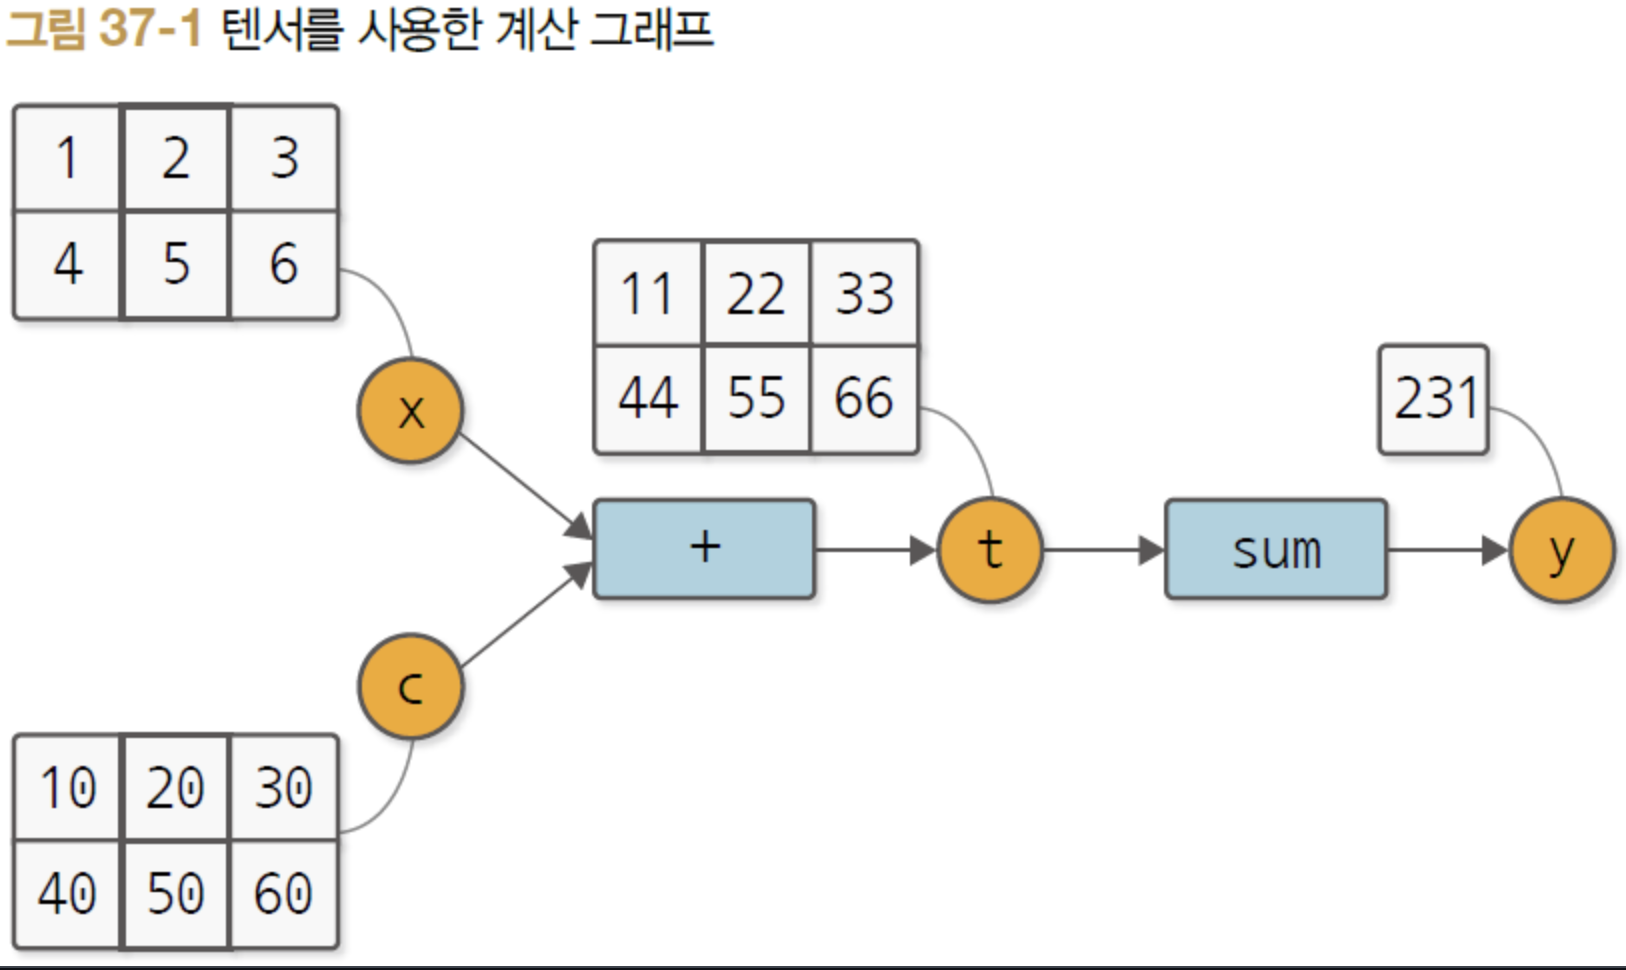

* 각 변수의 데이터를 구체적으로 보여준다.
* 그래서 마지막 출력은 스칼라임도 확인할 수 있다.
* 이번 단계는 이와 같이 '마지막 출력이 스칼라인 계산 그래프'에 대한 역전파를 다룬다.

In [19]:
y.backward(retain_grad = True)
print(y.grad)
print(t.grad)
print(x.grad)
print(c.grad)

variable(1)
variable([[1 1 1]
          [1 1 1]])
variable([[1 1 1]
          [1 1 1]])
variable([[1 1 1]
          [1 1 1]])


* 이와 같이 y.backward(retain_grad=True)를 실행하면 각 변수의 미분값이 구해진다.
* 인수 retain_grad를 True로 설정했으므로 미분값이 유지된다.
* 그리고 출력 결과가 올바르게 나왔음을 확인할 수 있다.


* 여기에 중요한 특징이 하나 등장한다.
* 기울기의 형상과 데이터(순전파 때의 데이터)의 형상이 일치한다는 것이다.
* 즉 x.shape == x.grad.shape이며, c.shape == c.grad.shape이고, t.shape == t.grad.shape이다.
* 이 성질을 이용하면 원소별 계산이 아닌 함수, 가령 sum이나 reshape 함수등을 구현하기도 어렵지 않다.

* 텐서의 미분을 머신러닝에서는 '기울기'라고 한다. Variable 클래스의 grad도 gradient(기울기)의 약자이다.

[보충] 텐서 사용 시의 역전파

* 이번 절에서는 텐서를 사용했을 때의 역전파를 수식으로 설명한다.
* y = F(x)라는 함수를 생각해보자. x와 y는 벡터이고, 두 벡터 모두 원소 수가 n개 라고 가정한다.

* 여기에서는 벡터에 한정하여 이야기를 진행한다. 그러나 이 절에서 얻은 결론(이론)은 '텐서(n차원 텐서)'의 경우에도 그대로 적용할 수 있다.
* 왜냐하면 데이터가 텐서일 경우에는 전처리로 '벡터화 처리'(원소를 1열로 정렬하는 형상 변환 처리)를 추가하면 되기 떄문이다.

* y와 x 모두 벡터이므로 그 미분은 이와 같이 '행렬'의 형태가 된다. 이 행렬은 야코비 행렬이라고도 한다.
* 이는 l x n의 야코비 행렬이며, 행 백터(가로로 나열된 벡터)로 간주할 수 있다.
* 다음으로 합성 함수에 대해 알아보자.
* 합성 함수가 y = F(x)가 a=A(x), b=B(a), y = C(b)라는 3개의 함수로 구성되어있다.
* 이때 변수 x, a, b는 벡터이고, 원소 수는 모두 똑같이 n개이다.
* 그리고 최종 출력 y만 스칼라인 경우를 가정한다.

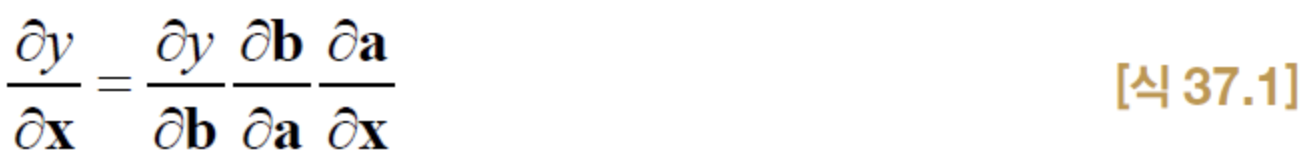

* 식 37.1이 연쇄 법칙에 의해 얻어지는 결과이다.
* 여기에서 ay/ab와 ab/aa는 야코비 행렬을 나타낸다.
* 그리고 이 값들을 '행렬의 곱'으로 계산한다.

* 이어서 식37.1의 행렬 곲을 계산하는 '순서'를 알아보자.
* 두가지 방법이 있다. 첫 번째 방법은 그림 37-2와 같이 입력 쪽에서 출력 쪽으로 계산해 가는 방식이다.

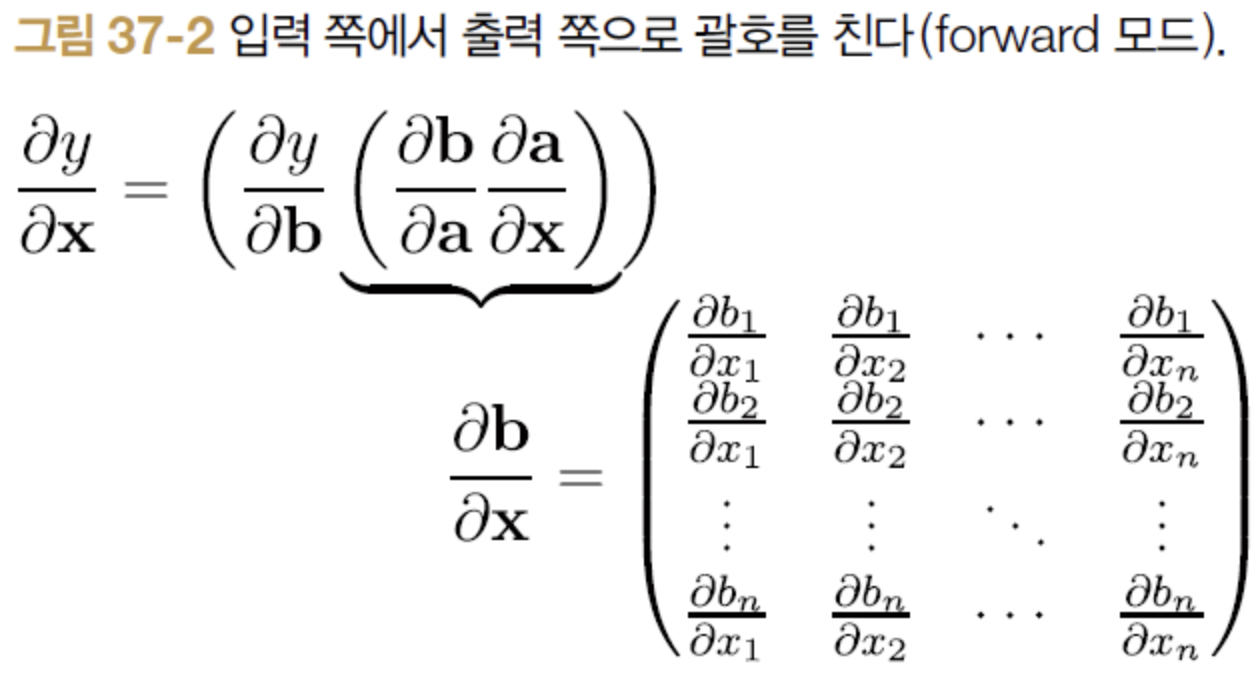

* 37-2와 같이 입력 쪽에서 출력 쪽으로 괄호를 치는 계산 방식을 '자동 미분의 forward 모드'라고 한다.
* 여기에서 주목할 점은 중간의 행렬 곱의 결과가 다시 행렬이 된다는 것이다.
* 예를 들어 ab/aa aa/ax의 결과는 n x n 행렬이다.

* 두번째 방법은 그림 37-3과 같이 출력 쪽에서 입력쪽으로 계산해가는 방식이다.
* revers 모드라고 한다.

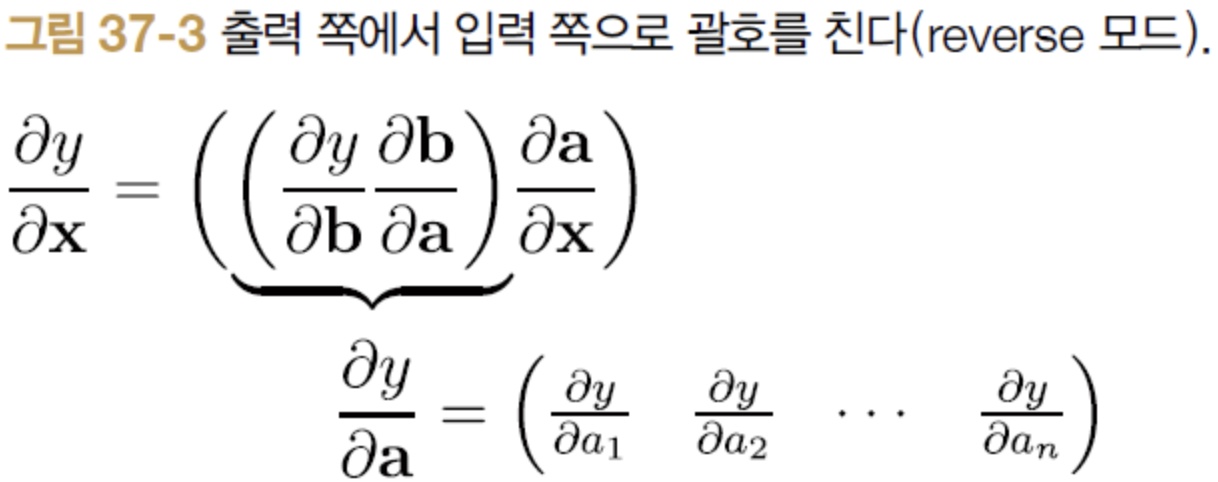

* 37-3은 출력쪽에서 입력 쪽으로 괄호를 쳐서 계산한다. 이때 y가 스칼라이므로 중간의 행렬 곱의 결과는 모두 벡터이다.
* 예를 들어 ay/ab ab/aa의 결과는 n개의 원소로 구성된 벡터이다.

* forward 모드는 n x n 행렬을 전파한다. 그에 비해 revers 모드에서는 n개의 벡터를 전파한다.
* 그런데 행렬과 행렬의 곱보다 벡터와 행렬의 곱 쪽의 계산량이 적다.
* 그런 이유로 reverse 모드, 즉 역전파 쪽의 계산 효율이 좋다.

* 여기에서 중요한 점은 명시적으로 야코비 행렬을 구하여 '행렬의 곱'을 계산할 필요가 없다는 것이다.
* 결과만 필요한 상황이라면 역전파 수행에 아무런 문제가 없다.
* 원소별 연산이 필요한 a = A(x), a = sin(x)로 예를 들면
* 원소별 연산의 야코비 행렬은 대각행렬이된다.
* xi는 ai에만 영향을 주기 떄문이다.
  * y1은 x1만 사용
  * y2는 x2만 사용
  * y3는 x3만 사용
* 최종결과는 원소별 미분을 계산한 다음 그 결괏값을 원소별로 곱하면 얻을 수 있다.
* 즉 원소별 연산에서는 역전파도 미분을 원소별로 곱하여 구한다는 뜻이다.

* 즉 단순히 결과만 구하면된다.

# step 38
형상 변환 함수

* 이전 단계에서는 텐서를 사용한 계산에서의 역전파를 설명했다.
  * 원소별 연산을 수행하는 함수(add, sin 등)는 입출력 데이터가 스칼라라고 가정하고 순전파와 역전파를 구현할 수 있다.
  * 이 경우 텐서를 입력해도 역전파가 올바르게 성립한다.

* 앞으로는 원소별로 계산하지 않는 함수에 대해 살펴본다.
* 이번단계에서는 텐서의 형상을 변환하는 reshape 함수와 행렬을 전치하는 transpose 함수이다.
* 두 함수 모두 텐서의 형상을 바꾸는 함수이다.

reshape 함수 구현

In [21]:
import numpy as np

x = np.array([[1,2,3], [4,5,6]])
y = np.reshape(x, (6,))
print(y)

[1 2 3 4 5 6]


* 계산을 원소별로 하지 않는 함수는 텐서의 형상을 고려해야한다.
* 그러면 역전파 구현이 명확해진다. 구체적으로는 변수의 데이터와 기울기의 형상이 일치하는지 확인해야한다.
* 예를 들어 x가 Variable 인스턴스일 때 x.data.shape == x.grad.shape를 만족할 수 있도록 역전파를 구현한다.

* reshape 함수는 단순히 형상만 변환한다. 다시 말해, 구체적인 계산은 아무것도 하지 않는다.
* 따라서 역전파는 출력 쪽에서 전해지는 기울기에 아무런 손도 대지않고 입력 쪽으로 흘려보내준다.
* 그러나 38-1과 같이 기울기의 형상이 입력의 형상과 같아지도록 변환한다.

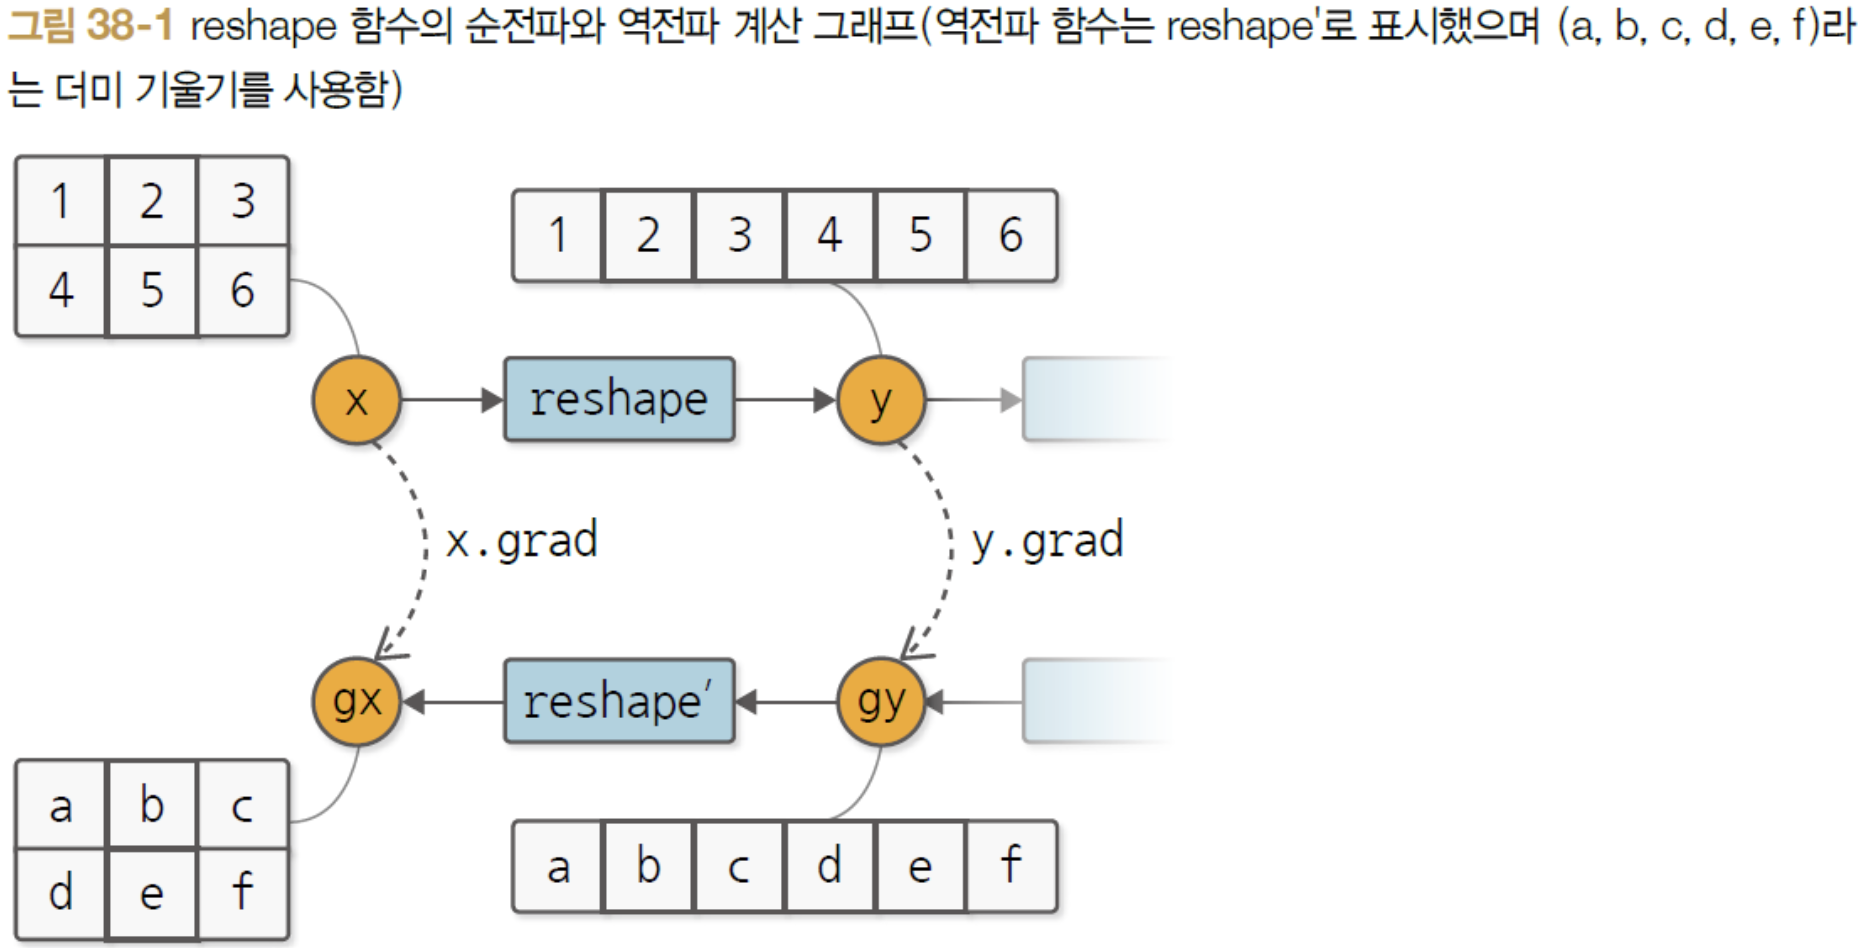

* 그림 38-1에서 역전파는 출력 쪽에서부터 기울기를 전달한다.
* 이 기울기를 x.data.shape와 일치하도록 변환하는데,
* 실제로 (6,)인 형상을 (2,3)으로 변환하고 있다. 즉, 입력 변수 쪽의 형상에 맞게 변환한다.

In [ ]:
class Reshape(Function):
    def __init__(self, shape):
        self.shape = shape

    def forward(self, x):
        self.x_shape = x.shape
        y = x.reshape(self.shape)
        return y

    def backward(self, gy):
        return reshape(gy, self.x_shape)

* 우선 Reshape 클래스를 초기화할 때 변형 목표가 되는 형상을 shape 인수로 받는다.
* 그리고 forward 메서드(순전파)는 넘파이의 reshape 함수를 사용하여 형상을 변환한다.
* 이때 self.x_shape = x.shape 코드에서 입력 x의 형상을 기억해둔다.
* 이렇게 하여 backward 메서드(역전파)에서 입력 형상(self.x_shape)으로 변환할 수 있다는 것이다.

* backward(gy)의 인수 gy는 Variable 인스턴스이다.
* 따라서 backward(gy)에서는 Variable 인스턴스를 다루는 DeZero 함수를 사용해 계산해야한다.

In [23]:
from dezero.core import as_variable

def reshape(x, shape):
    if x.shape == shape:
        return as_variable(x)
    return Reshape(shape)(x)

* 여기서는 인수 x는 ndarray 인스턴스 또는 Variable 인스턴스 중 하나라고 가정했다.
* 만약 x.shape == shape면 아무 일도 하지 않고 x를 그대로 돌려준다.
* 하지만 reshape 함수가 Variable인스턴스를 반환함을 보장하기 윟 as_variable 함수를 사용하여 Varialbe 인스턴스로 변환합니다.

* DeZero 함수는 항상 Variable 또는 ndarray 인스턴스를 입력받아 Variable 인스턴스를 반환하는게 규칙이다.

In [26]:
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array([[1,2,3], [4,5,6]]))
y = F.reshape(x, (6,))
y.backward(retain_grad=True)
print(x.grad)

variable([[1 1 1]
          [1 1 1]])


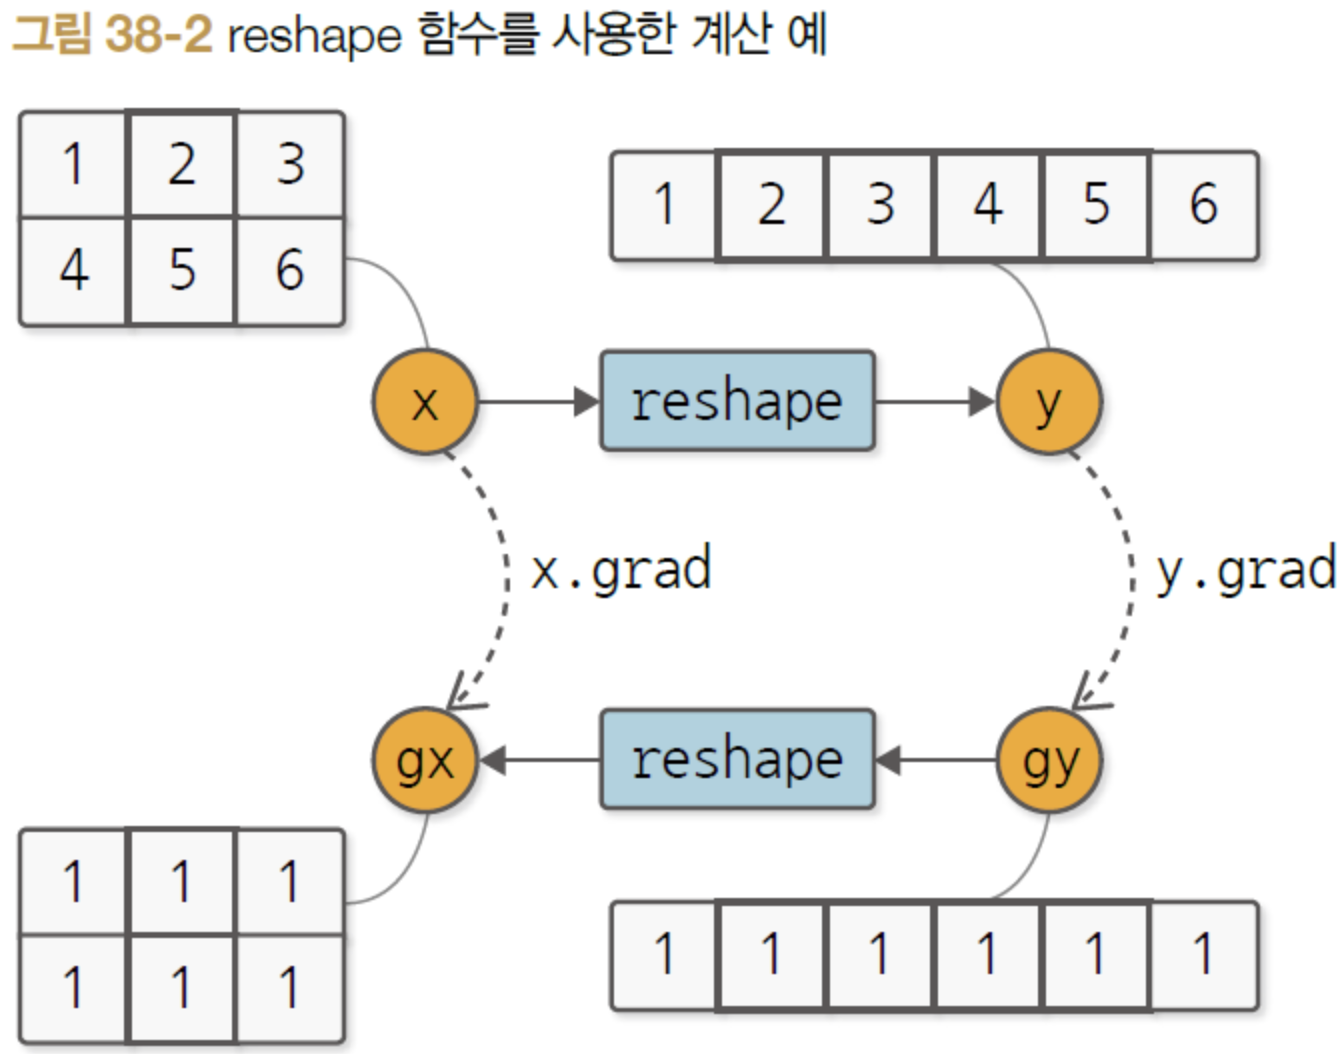

* 그림 38-2와 같이 순전파에서는 탠서의 형상이 (2,3)에서 (6,)으로 변한다.
* 그리고 역전파에서는 기울기의 형상이 (2,3)으로, 순전파 때와는 반대로 변한다.
* 이떄 각 변수의 data와 grad의 형상이 일치함을 확인할 수 있다.


Variable에서 reshape 사용하기

In [27]:
x = np.random.rand(1, 2, 3)

y = x.reshape((2,3)) # 튜플로 받기
y = x.reshape([2,3]) # 리스트로 받기
y = x.reshape(2,3) # 인수를 그대로(풀어서) 받기

* 보다시피 reshape를 ndarray 인스턴스의 메서드로 사용할 수 있다. 또한 x.reshape(2, 3)과 같이 가변 인수도 받는다.


In [29]:
import dezero

class Variable:
    ...

    def reshape(self, *shape):
        if len(shape) == 1 and isinstance(shape[0], (tuple, list)):
            shape = shape[0]
        return dezero.functions.reshape(self, shape)

In [28]:
x = Variable(np.random.rand(1,2,3))
y = x.reshape((2,3))
y = x.reshape(2,3)

행렬의 전치

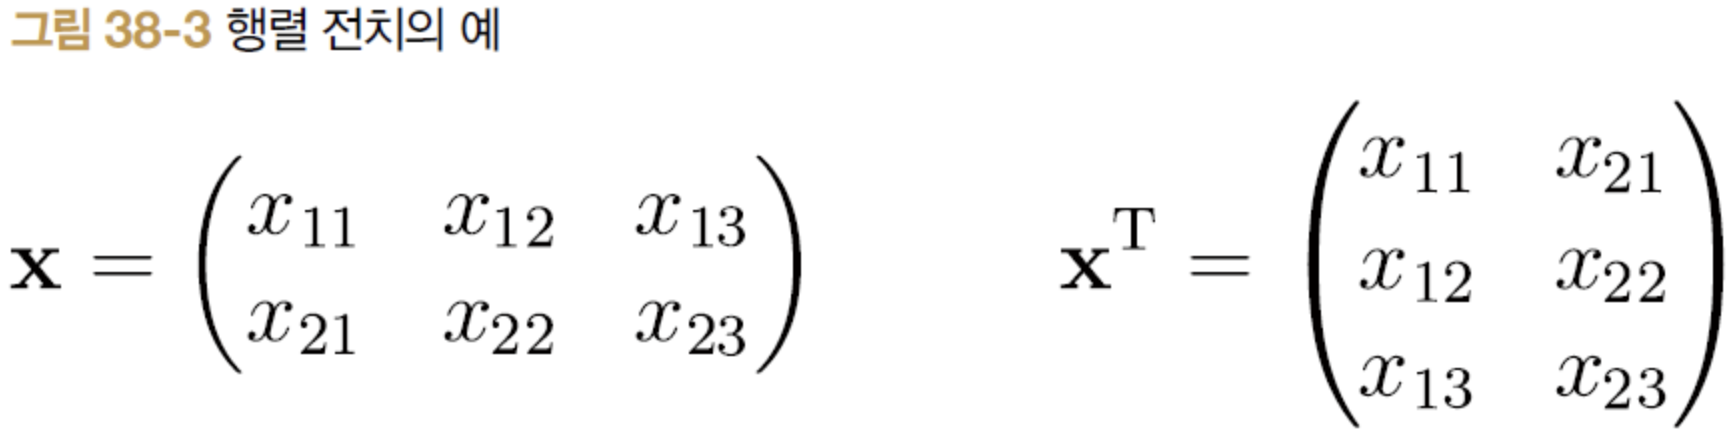

* 당장은 입력 변수가 행렬(2차원 텐서)일 때로 한정하여 transpose 함수를 구현한다.
* 넘파이에서도 transpose 함수를 사용하여 전치할 수 있다.

In [30]:
x = np.array([[1,2,3], [4,5,6]])
y = np.transpose(x)
print(y)

[[1 4]
 [2 5]
 [3 6]]


In [ ]:
class Transpose(Function):
    def forward(self, x):
        y = np.transpose(x)
        return y

    def backward(self, gy):
        gx = transpose(gy)
        return gx

def transpose(x):
    return Transpose()(x)

In [ ]:
# 예
x = Variable(np.array([[1,2,3], [4,5,6]]))
y = F.transpose(x)
y.backward()
print(x.grad)

* 보다시피 transpose 함수를 사용하여 계산할 수 있으며 역전파도 제대로 이루어진다.
* 이어서 Variable 인스턴스에서도 transpose 함수를 사용할 수 있도록 다음 코드를 추가한다.

In [ ]:
class Variable:

    def transepose(self):
        return dezero.functions.transpose(self)

    @property
    def T(self):
        return dezero.functions.transpose(self)

* 이번에는 두 개의 메서드를 추가했다. 첫 번째인 transpose는 '인스턴스 메스드'로 이용하기 위한 코드이다.
* 두번 째 T에는 @property 데코레이터가 붙어 있는데, '인스턴스 변수'로 사용할 수 있게 해주는 데코레이터이다.

In [ ]:
x = Variable(np.random.rand(2, 3))
y = x.transpose()

y = x.T

[보충] 실제 transpose 함수

* 더 범용적으로 사용할 수 있다.
* 바로 데이터 순서를 바꿀 수 있다.

In [33]:
A, B, C, D = 1, 2, 3, 4
x = np.random.rand(A, B, C, D)
y = x.transpose(1, 0, 3, 2)

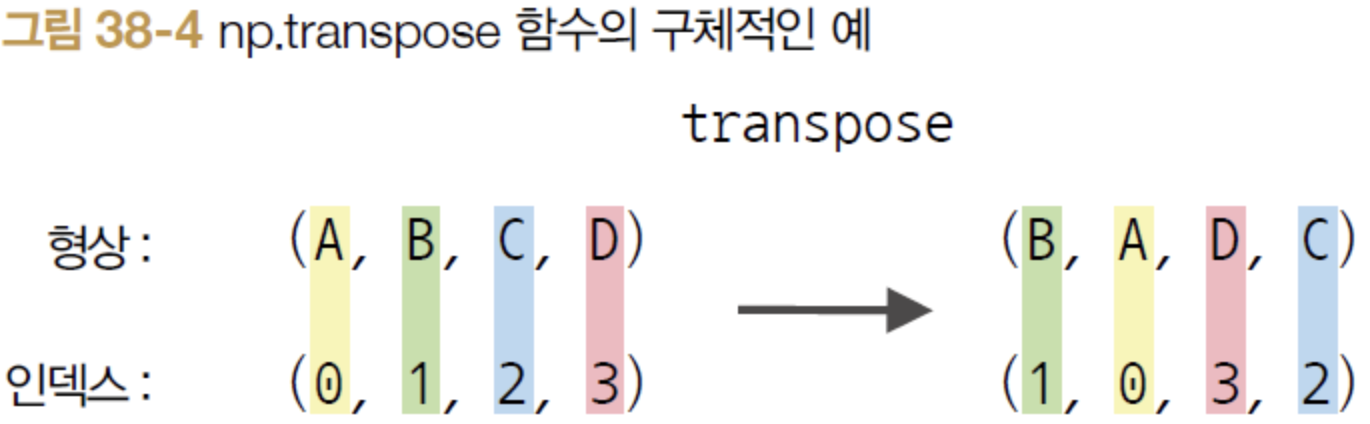

* 이와 같이 축의 순서를 지정하면 그에 맞게 데이터의 축이 달라진다.
* 그리고 인수를 None으로 주면 축이 역순을 정렬된다. (기본값은 None)
* 따라서 x가 행렬일 때 x.transpose()를 실행하면 0번재와 1번째 축의 데이터가 1번째와 0번째 순서로 바뀐다.